In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Load the dataset
file_path = 'AirQualityUCI.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataset to understand its structure
print(data.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000 

In [4]:
# Task 1: Data Cleaning and Exploratory Data Analysis (EDA)

# Check for missing values
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [5]:
# Replace invalid values (-200) with NaN to indicate missing data
data_cleaned = data.replace(-200, np.nan)

In [6]:
# Check for missing data after cleaning
cleaned_missing_data = data_cleaned.isnull().sum()
print("Missing Data After Cleaning:\n", cleaned_missing_data)

Missing Data After Cleaning:
 Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [7]:
# Drop rows with missing data to simplify the analysis
data_cleaned = data_cleaned.dropna()

In [8]:
# Check the basic statistics of the cleaned data
print("Data Description:\n", data_cleaned.describe())

Data Description:
            CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.741838   231.025393   10.772367     965.983777   
std      1.409496   241.826753   208.461912    7.417127     266.413137   
min      0.300000   752.500000     7.000000    0.542781     447.500000   
25%      1.300000  1016.875000    77.000000    4.804320     753.500000   
50%      2.000000  1172.000000   157.000000    9.125831     944.250000   
75%      3.100000  1380.250000   318.500000   14.803204    1142.375000   
max      8.100000  2039.750000  1189.000000   39.202340    1754.250000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.000000    827.000000   827.000000   
mean   143.501814    963.178053  100.259976   1600.506550  1045.691052   
std     81.829717    265.906153   31.493823    302.290036   400.130277   
min     12.000000 

In [9]:
# EDA: Data Types and Correlation Analysis
print("Data Types:\n", data_cleaned.dtypes)

Data Types:
 Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_1856\1044411745.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


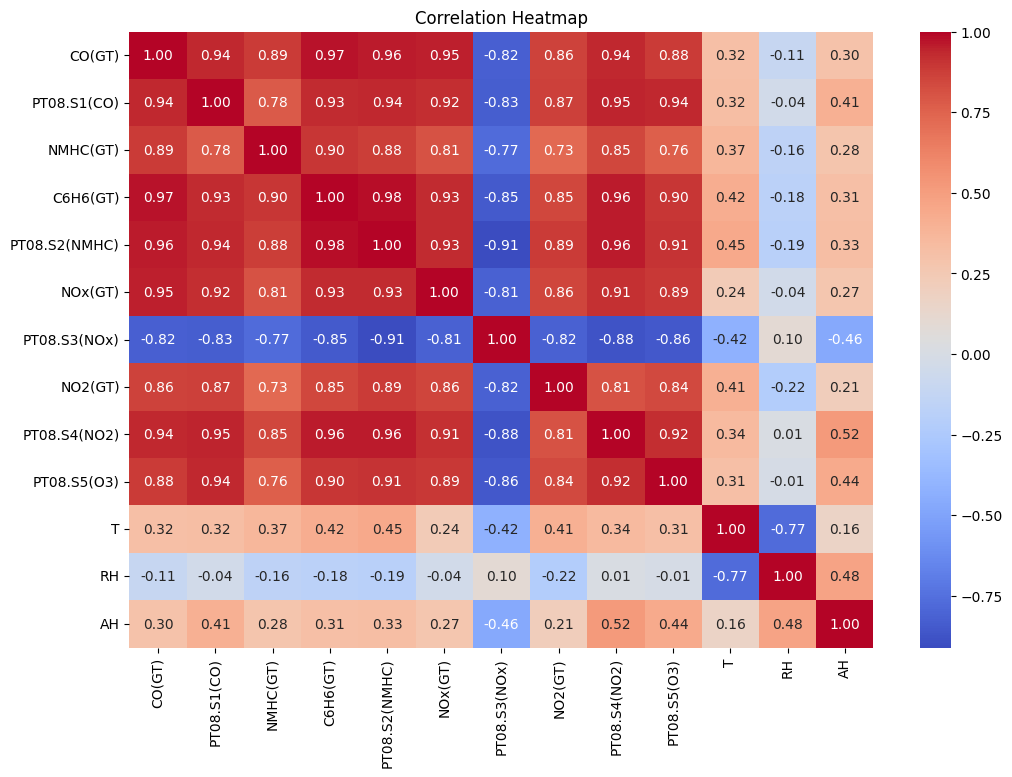

In [10]:
# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

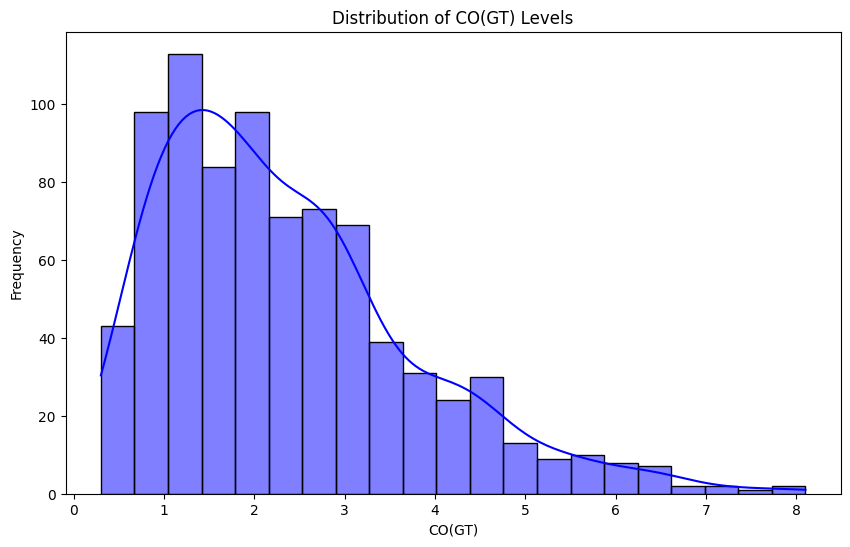

In [11]:
# Plotting the distribution of CO(GT) levels
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['CO(GT)'], kde=True, color='blue')
plt.title('Distribution of CO(GT) Levels')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()

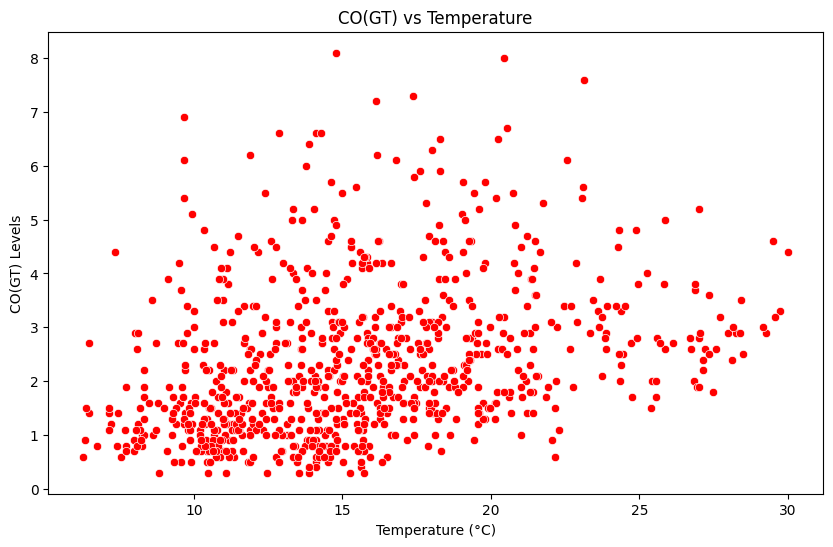

In [12]:
# Scatter plot: CO(GT) vs Temperature (T)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['T'], y=data_cleaned['CO(GT)'], color='red')
plt.title('CO(GT) vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('CO(GT) Levels')
plt.show()

In [13]:
# Task 2: Machine Learning Model Selection

# Define features and target variable
X = data_cleaned[['T', 'RH', 'AH']]  # Features (Temperature, Relative Humidity, Absolute Humidity)
y = data_cleaned['CO(GT)']  # Target variable (CO levels)

In [14]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [16]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [17]:
# Task 3: Model Evaluation and Visualization

from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Linear Regression - MAE: {mae_linear}, R²: {r2_linear}')
print(f'Random Forest - MAE: {mae_rf}, R²: {r2_rf}')

Linear Regression - MAE: 0.968884196201478, R²: 0.1830979454558621
Random Forest - MAE: 0.9484492753623189, R²: 0.18088558000813237


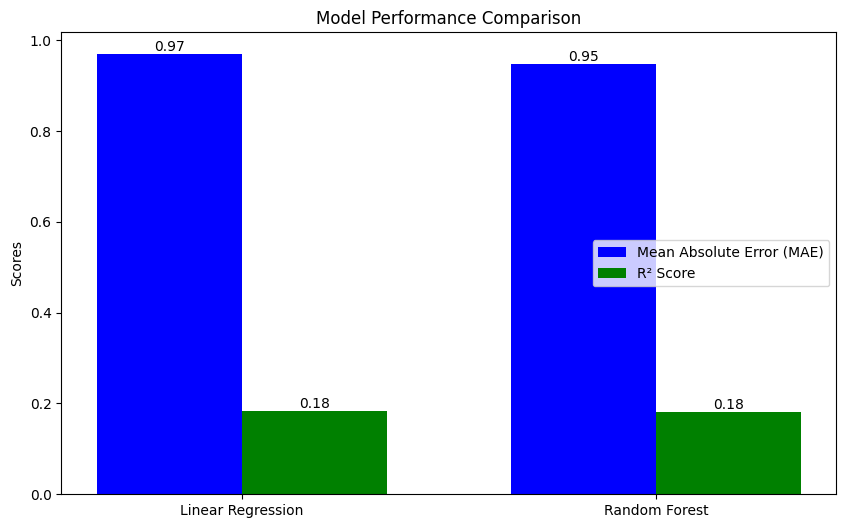

In [18]:
# Comparison Graph of Model Performance
models = ['Linear Regression', 'Random Forest']
mae_scores = [mae_linear, mae_rf]
r2_scores = [r2_linear, r2_rf]

# Creating a comparison graph
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, mae_scores, width, label='Mean Absolute Error (MAE)', color='blue')
bars2 = ax.bar(x + width/2, r2_scores, width, label='R² Score', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding text annotations inside the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

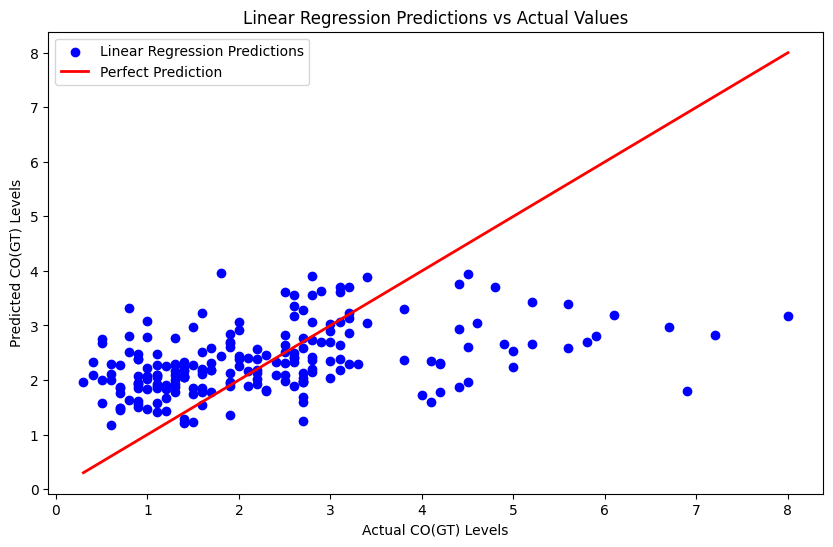

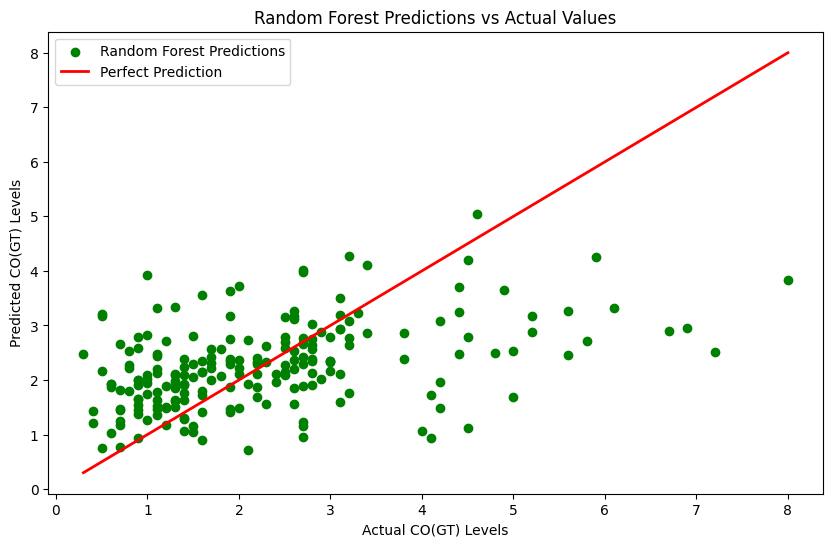

In [19]:
# Visualization for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression Predictions vs Actual Values')
plt.xlabel('Actual CO(GT) Levels')
plt.ylabel('Predicted CO(GT) Levels')
plt.legend()
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.title('Random Forest Predictions vs Actual Values')
plt.xlabel('Actual CO(GT) Levels')
plt.ylabel('Predicted CO(GT) Levels')
plt.legend()
plt.show()